# Make an `ipywidgets` with `sympy`

In this example we will explore integration.   The widget that shows the area under a curve and evaluate the integral.

The steps:

1. pick an equation
2. create the widgets
3. Add observable behaviors to the widgets
4. Are there some simple styles to add?
5. Make the tool reusable.

In [1]:
    %reload_ext pidgin
    %matplotlib agg

In [19]:
# Make an `ipywidgets` with `sympy`

    from sympy import *
    import ipywidgets, sympy, matplotlib.pyplot, numpy as np, IPython, io
    
Provide $LatEx$ representations for `sympy` expressions.
    
    init_printing()

For some folks this may not be necessary.
    
    ip = get_ipython()


'# Make an `ipywidgets` with `sympy`\n\n    from sympy import *\n    import ipywidgets, sympy, matplotlib.pyplot, numpy as np, IPython, io\n    \nProvide $LatEx$ representations for `sympy` expressions.\n    \n    init_printing()\n\nFor some folks this may not be necessary.\n    \n    ip = get_ipython()\n'


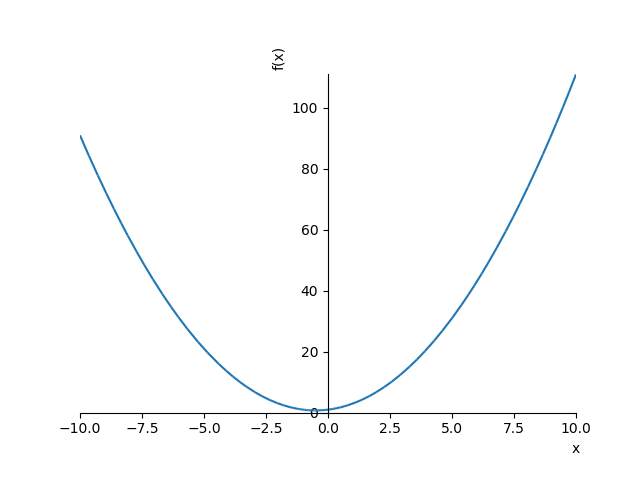

"Our example equation `f` came from the [`sympy` docs](https://docs.sympy.org/latest/modules/integrals/integrals.html).\n    \n    x = symbols('x')\n    f = x**2 + x + 1\n\n    a, b = symbols('a b') \n    g = Integral(f, (x, a, b))\n\n`f` is {{f}} and its integral between `a` and `b` is {{g}}.\n\n    plot(f, (x, -10, 10))"

In [22]:
Our example equation `f` came from the [`sympy` docs](https://docs.sympy.org/latest/modules/integrals/integrals.html).
    
    x = symbols('x')
    f = x**2 + x + 1

    a, b = symbols('a b') 
    g = Integral(f, (x, a, b))

`f` is {{f}} and its integral between `a` and `b` is {{g}}.

    plot(f, (x, -10, 10))

In [23]:
## Widgets

Provide the limits 
    
    limits = ipywidgets.FloatRangeSlider(min=-100, max=100)
    limits.value = -30, 70
    α, β = limits.value
    
A place to show the area under the curve.
    
    area = ipywidgets.FloatText(g.subs({a: α, b: β}).integrate((x, α, β)))
    area.style.description_width = '200px'
    
A place for the plot view.
    
    output = ipywidgets.Output()

    app = ipywidgets.VBox([limits, area, output])

"## Widgets\n\nProvide the limits \n    \n    limits = ipywidgets.FloatRangeSlider(min=-100, max=100)\n    limits.value = -30, 70\n    α, β = limits.value\n    \nA place to show the area under the curve.\n    \n    area = ipywidgets.FloatText(g.subs({a: α, b: β}).integrate((x, α, β)))\n    area.style.description_width = '200px'\n    \nA place for the plot view.\n    \n    output = ipywidgets.Output()\n\n    app = ipywidgets.VBox([limits, area, output])"

In [24]:
Set a default `IPython` display for the notebook as a module so `__import__(__name__) ` is our display.
    
    def _ipython_display_(): IPython.display.display(app)

'Set a default `IPython` display for the notebook as a module so `__import__(__name__) ` is our display.\n    \n    def _ipython_display_(): IPython.display.display(app)'

In [29]:
    def update_app(change):
Get the limits of the integration

        α, β = limits.value 

Set the __xx__ values.

        xx = np.linspace(α, β, 101)
    
Plot the `sympy` function with the fill between.

        p = plot(f, (x, limits.min, limits.max))
        p._backend.plt.fill_between(xx, lambdify(x, f)(xx))
        
Move the matplotlib image into the ipython display
        
        area.description = ip.display_formatter.format(g.subs({a: α, b: β}))[0]['text/latex']
        
        area.value = g.subs({a: α, b: β}).integrate((x, α, β))
        
        img = io.BytesIO()
        p._backend.fig.savefig(img)
        output.clear_output(True)
        with output: 
            IPython.display.display(IPython.display.Image(data=img.getvalue()))

    limits.observe(update_app); update_app({})

"    def update_app(change):\nGet the limits of the integration\n\n        α, β = limits.value \n\nSet the __xx__ values.\n\n        xx = np.linspace(α, β, 101)\n    \nPlot the `sympy` function with the fill between.\n\n        p = plot(f, (x, limits.min, limits.max))\n        p._backend.plt.fill_between(xx, lambdify(x, f)(xx))\n        \nMove the matplotlib image into the ipython display\n        \n        area.description = ip.display_formatter.format(g.subs({a: α, b: β}))[0]['text/latex']\n        \n        area.value = g.subs({a: α, b: β}).integrate((x, α, β))\n        \n        img = io.BytesIO()\n        p._backend.fig.savefig(img)\n        output.clear_output(True)\n        with output: \n            IPython.display.display(IPython.display.Image(data=img.getvalue()))\n\n    limits.observe(update_app); update_app({})"

In [30]:
<style>
label.widget-label {
    height: 4em !important;
}
</style>


'<style>\nlabel.widget-label {\n    height: 4em !important;\n}\n</style>\n'

In [31]:
    __import__(__name__)